# SEA4001W - Introduction to Ocean modelling - Exercise 10 - 23/05/2025
# Ethan Smith SMTETH005 

## Original setup:

#### Packages: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

#### Problem parameters: 

In [2]:
c=1         # Advection speed [m s-1]
dx=500      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days] (boundary)
xmax=10.0e3 # length of the basin [m] (boundary)

#### Grid definition:

In [3]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)   # number of grid points
print('grid size : ',IM)
print('number of timesteps : ',NT)

grid size :  40
number of timesteps :  44


#### Spatial shape of the temperature disturbance:

In [4]:
def Gaussian(x):
    # This is a Gaussian (peak) function with the following params
    T0 = 15         # baseline temperature [degC]
    sigma = 1000.   # width at half amplitude [m]
    A = 5.          # amplitude [degC]
    Gaussian = T0+A*np.exp(-(x/sigma)**2)
    return Gaussian

#### Plot an animation of the temperature disturbance

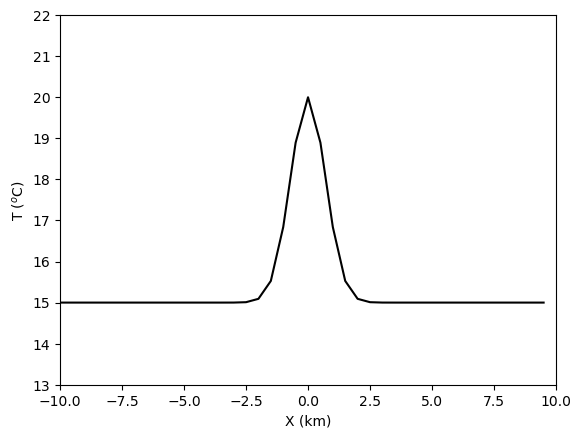

In [5]:
fig, ax = plt.subplots()
# set the axis limits and turn off autoscaling
plt.axis([-xmax/1000, xmax/1000, 13, 22])
plt.autoscale(False)
line, = ax.plot(x/1000., Gaussian(x),'k')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the data.
    return line,

# create the animation (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=200, blit=True, frames=NT, repeat=True)

In [6]:
HTML(ani.to_jshtml())

## Modified setup: x-grid step and advection speed

When you **decrease the x-step**, you **increase the resolution** of the solution. The curve is smooth compared to one of lower resolution. By increasing the advection speed you simply propagate the distrubance faster in the positive x-direction. If you make the **advection speed negative**, the disturbance **propagates** in the **negative x-direction**. 

#### Problem parameters: 

In [7]:
c=-4        # Advection speed [m s-1]
dx=50      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days] (boundary)
xmax=10.0e3 # length of the basin [m] (boundary)

#### Grid definition:

In [8]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)   # number of grid points
print('grid size : ',IM)
print('number of timesteps : ',NT)

grid size :  400
number of timesteps :  44


#### Spatial shape of the temperature disturbance:

In [9]:
def Gaussian(x):
    # This is a Gaussian (peak) function with the following params
    T0 = 15         # baseline temperature [degC]
    sigma = 1000.   # width at half amplitude [m]
    A = 5.          # amplitude [degC]
    Gaussian = T0+A*np.exp(-(x/sigma)**2)
    return Gaussian

#### Plot an animation of the temperature disturbance

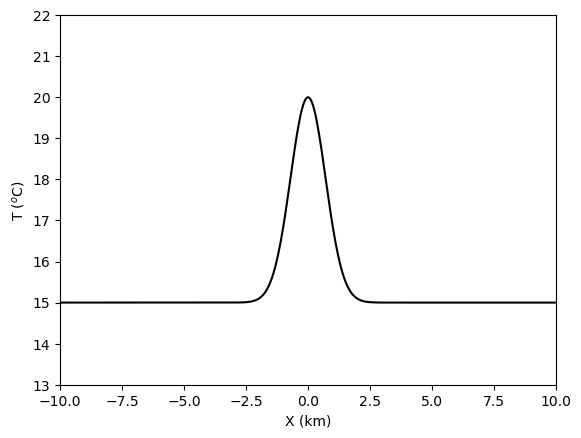

In [10]:
fig, ax = plt.subplots()
# set the axis limits and turn off autoscaling
plt.axis([-xmax/1000, xmax/1000, 13, 22])
plt.autoscale(False)
line, = ax.plot(x/1000., Gaussian(x),'k')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the data.
    return line,

# create the animation (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=200, blit=True, frames=NT, repeat=True)

In [11]:
HTML(ani.to_jshtml())

## Modified setup: sigma (spread) parameter

When you **increase the spread** $(\sigma)$, the **width** of the disturbance **increases**. This means that it spreads further on either sides of it's maximum value. If you **decrease the spread**, the **width** of the disturbance **decreases** in the same fashion. **If** the **spread is narrower than the x-step**, the solution becomes **jittery**. This is because the gradients are not evaluated correctly. 

#### Problem parameters: 

In [12]:
c=1         # Advection speed [m s-1]
dx=500      # X resolution [m]
dt=200      # time step [s]
t0=0.       # initial time
tmax=0.1    # duration of simulation [days] (boundary)
xmax=10.0e3 # length of the basin [m] (boundary)

#### Grid definition:

In [13]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)   # number of grid points
print('grid size : ',IM)
print('number of timesteps : ',NT)

grid size :  40
number of timesteps :  44


#### Spatial shape of the temperature disturbance:

In [14]:
def Gaussian(x):
    # This is a Gaussian (peak) function with the following params
    T0 = 15         # baseline temperature [degC]
    sigma = 200.   # width at half amplitude [m]
    A = 5.          # amplitude [degC]
    Gaussian = T0+A*np.exp(-(x/sigma)**2)
    return Gaussian

#### Plot an animation of the temperature disturbance

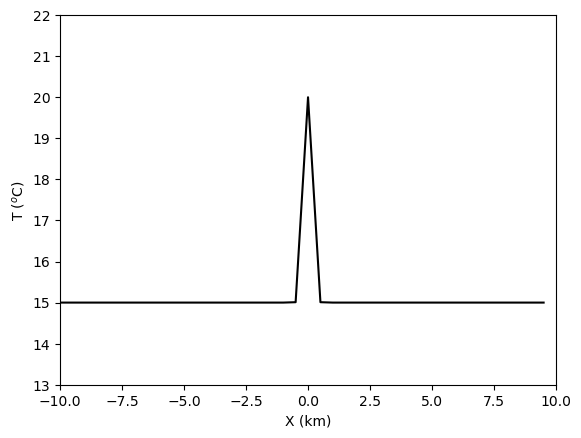

In [15]:
fig, ax = plt.subplots()
# set the axis limits and turn off autoscaling
plt.axis([-xmax/1000, xmax/1000, 13, 22])
plt.autoscale(False)
line, = ax.plot(x/1000., Gaussian(x),'k')
ax.set_xlabel('X (km)')
ax.set_ylabel('T ($^o$C)')

def animate(i):
    t = t0 + i*dt
    line.set_ydata(Gaussian(x-c*t))  # update the data.
    return line,

# create the animation (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=200, blit=True, frames=NT, repeat=True)

In [16]:
HTML(ani.to_jshtml())